In [1]:
%matplotlib notebook

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
from bqplot import pyplot as bqp

In [4]:
import batman
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
from aux import get_flux

In [5]:
tdata = np.loadtxt('folded_corr_norm_prim_z.tbl')
idx = tdata[:, 0].argsort()
tdata = tdata[idx, :]
x = tdata[:, 0] - 1
y = tdata[:, 1]
dy = tdata[:, 2]

In [6]:
x, y, dy = np.loadtxt('fake.dat').T

In [7]:
x2 = np.linspace(x[0], x[-1], len(x))

In [8]:
p_sol = [0.1, 15., 0.1, 87., 90.]

<IPython.core.display.Javascript object>


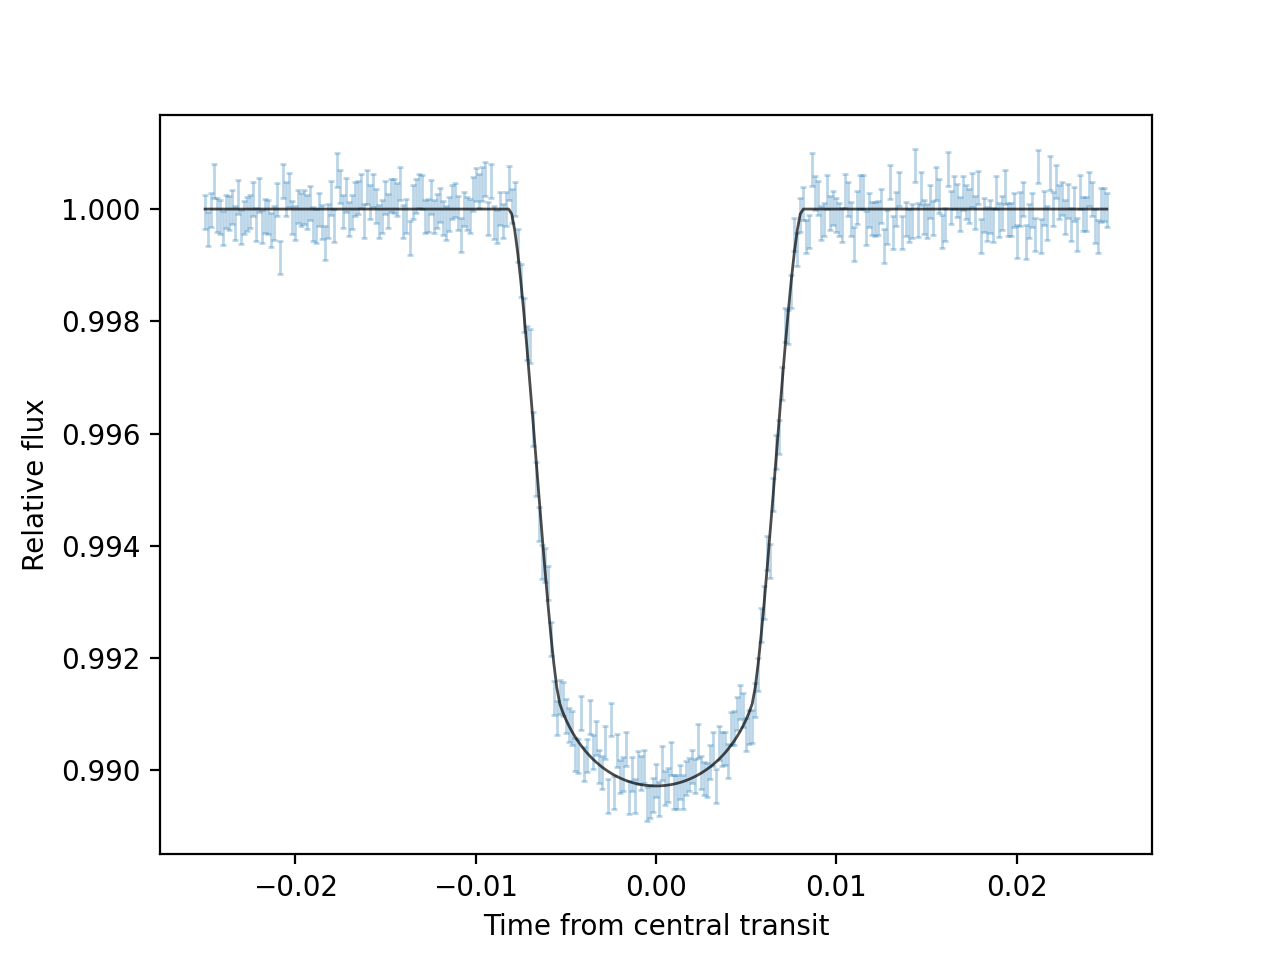

In [9]:
flux = get_flux(x2, *p_sol)

f, ax = plt.subplots()
ax.errorbar(x, y, dy, ls='none', elinewidth=1, capsize=1, alpha=0.3)
ax.plot(x2, flux, 'k-', lw=1, alpha=0.7)
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux");

In [15]:
bqp.close(4)

In [16]:
html = widgets.HTML(
    value='<h3>Transit Simulator</h3>', 
    description='')
 
rp_text   = widgets.Label(value='Radius des Planeten [in Sternenradiien]')
rp_slider = widgets.FloatSlider(value=0.01, min=0.01, max=1, step=0.005, description='')

a_text    = widgets.Label(value='Große Hauptachse [in Sternenradien]')
a_slider  = widgets.FloatSlider(value=5, min=0.01, max=50, step=0.1, description='')

e_text    = widgets.Label(value='Exzentrizität')
e_slider  = widgets.FloatSlider(value=0, min=0, max=0.99, step=0.01, description='')

i_text    = widgets.Label(value='Inklination [Grad]')
i_slider  = widgets.FloatSlider(value=90, min=0, max=90, step=1, description='')

w_text    = widgets.Label(value='Apsidenlinie [Grad]')
w_slider  = widgets.FloatSlider(value=180, min=0, max=360, step=1, description='')

button = widgets.Button(description='Berechne!')


output = widgets.Output()

with output:
    #f, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    bqp.figure(4, title='Transit Daten', constrained_layout=True)
    bqp.plot(x, y)
    line = bqp.plot(x2, np.ones_like(x2), c='k--')
    bqp.show()
    
ax.errorbar(x, y, dy, ls='none', elinewidth=1, capsize=1, alpha=0.3)
ax.plot(x2, np.ones_like(x2), 'k-', lw=1, alpha=0.7)
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux");

def update(self):
    """Draw line in plot"""
    rp  = rp_slider.value
    a   = a_slider.value
    ecc = e_slider.value
    inc = i_slider.value
    w   = w_slider.value
    line.y = get_flux(x2, rp, a, ecc, inc, w)
    
button.on_click(update)

widgets.VBox([
    html,
    widgets.HBox([
        widgets.VBox([
            rp_text, rp_slider,
            a_text, a_slider,
            e_text, e_slider,
        ]),
    widgets.VBox([
        i_text, i_slider,
        w_text, w_slider,
        ]),
    ]),
    button,
    output
])

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
